In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame (wine_load.data, columns=wine_load.feature_names)
wine['class']=wine_load.target
wine['class']=wine['class'].map({0:'class 0',1:'class 1',2:'class 2'})

wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class 0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class 0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class 0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class 0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class 0


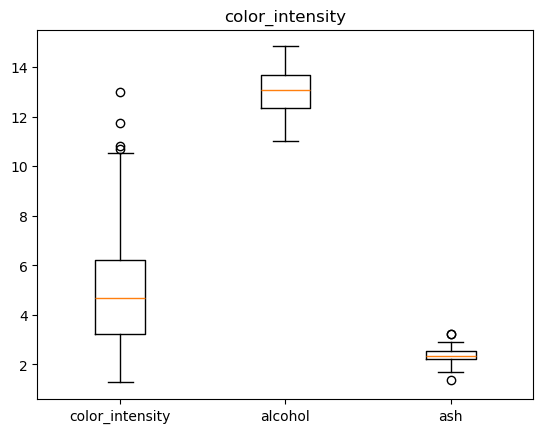

In [10]:
plt.boxplot(wine[['color_intensity','alcohol','ash']], whis=1.5, tick_labels=['color_intensity','alcohol','ash'])
plt.title('color_intensity')
plt.show()

In [16]:
import numpy as np
def outliers_iqr(dt, col):
    qr1, qr3 = np.percentile(dt[col],[25,75])
    iqr = qr3-qr1
    low_whis = qr1 - 1.5*iqr
    high_whis = qr3 + 1.5*iqr
    outliers = dt[(dt[col] > high_whis) | (dt[col] < low_whis)]
    return outliers

outliers = outliers_iqr(wine,'color_intensity')
outliers['color_intensity']

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64

In [17]:
drop_outliers = wine.drop(index=outliers.index)

print('Original: ', wine.shape)
print('Drop out: ', drop_outliers.shape)

Original:  (178, 14)
Drop out:  (174, 14)


In [28]:
#이상치를 NaN으로 변경
wine.loc[outliers.index,'color_intensity'] = np.NaN

#NaN이 된 이상치를 평균값으로 변경
print(wine['color_intensity'].mean())
wine['color_intensity']=wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index,'color_intensity'].head()

4.908678155172414


151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [32]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

IRIS=load_iris()
iris=pd.DataFrame (IRIS.data, columns=IRIS.feature_names)
iris['class'] = IRIS.target
iris['class'] = iris['class'].map({0:'setosa',1:'versicolor',2:'virginica'})

iris_dummy = pd.get_dummies(iris,columns=['class'])
iris_dummy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_setosa,class_versicolor,class_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [47]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(iris.drop(columns='class'), \
                                    iris['class'], test_size=0.2, random_state=1004)
print('X_train:',X_train.shape, ' x_test:',x_test.shape)
print('Y_train:',Y_train.shape, ' y_test:',y_test.shape)

X_train.head(3)
Y_train.head(3)

print(iris['class'].value_counts())
print(Y_train.value_counts())

X_train: (120, 4)  x_test: (30, 4)
Y_train: (120,)  y_test: (30,)
class
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
class
versicolor    41
setosa        40
virginica     39
Name: count, dtype: int64


In [48]:
X_train, x_test, Y_train, y_test = train_test_split(iris.drop(columns='class'), \
                                    iris['class'], test_size=0.2, random_state=1004, stratify=iris['class'])
print('X_train:',X_train.shape, ' x_test:',x_test.shape)
print('Y_train:',Y_train.shape, ' y_test:',y_test.shape)

print(Y_train.value_counts())

X_train: (120, 4)  x_test: (30, 4)
Y_train: (120,)  y_test: (30,)
class
versicolor    40
virginica     40
setosa        40
Name: count, dtype: int64


In [58]:
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()

StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)

x_test_sc = StdScaler.transform(x_test)

print('\t\t(min,max) (mean, std)')
print('Train_scaled (%.2f, %.2f), (%.2f, %.2f)' %(X_train_sc.min(),X_train_sc.max(),X_train_sc.mean(),X_train_sc.std()))
print('Test_scaled (%.2f, %.2f), (%.2f, %.2f)' %(x_test_sc.min(),x_test_sc.max(),x_test_sc.mean(),x_test_sc.std()))

		(min,max) (mean, std)
Train_scaled (-2.37, 3.04), (0.00, 1.00)
Test_scaled (-1.76, 2.48), (-0.01, 0.97)


In [59]:
from sklearn.preprocessing import MinMaxScaler
MmScaler = MinMaxScaler()

MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

x_test_sc = MmScaler.transform(x_test)

print('\t\t(min,max) (mean, std)')
print('Train_scaled (%.2f, %.2f), (%.2f, %.2f)' %(X_train_sc.min(),X_train_sc.max(),X_train_sc.mean(),X_train_sc.std()))
print('Test_scaled (%.2f, %.2f), (%.2f, %.2f)' %(x_test_sc.min(),x_test_sc.max(),x_test_sc.mean(),x_test_sc.std()))

		(min,max) (mean, std)
Train_scaled (0.00, 1.00), (0.46, 0.27)
Test_scaled (0.03, 1.06), (0.45, 0.26)


Scaler 종류: StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

뒤 2개는 실습하지 않고 넘어감  
(줄 맨 끝에 공백 2칸이면 다음 줄로 변경됨)

In [60]:
pd.DataFrame(X_train_sc).head(3)

,0,1,2,3
0,0.764706,0.458333,0.661017,0.583333
1,0.382353,0.333333,0.661017,0.791667
2,0.411765,0.416667,0.542373,0.458333


In [62]:
X_Original = MmScaler.inverse_transform(X_train_sc)

pd.DataFrame(X_Original).head(3)

,0,1,2,3
0,6.9,3.1,4.9,1.5
1,5.6,2.8,4.9,2.0
2,5.7,3.0,4.2,1.2


          0         1         2         3
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444


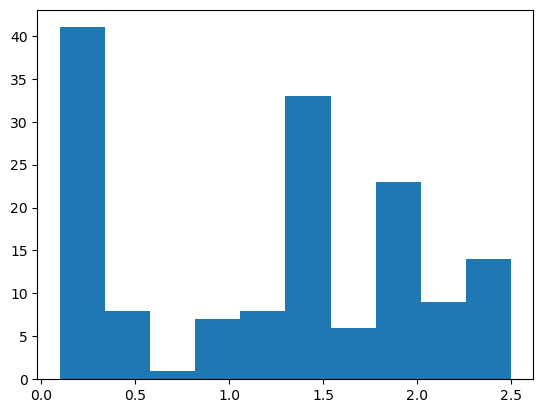

In [75]:
x = iris.drop(columns='class')

from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

print(pd.DataFrame(x).head())

import matplotlib.pyplot as plt
plt.hist(iris['petal width (cm)'],bins=10)
plt.show()

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_fit = pca.fit(x)

print('고유값: ', pca.singular_values_)
print('분산 설명력: ', pca.explained_variance_ratio_)

고유값:  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


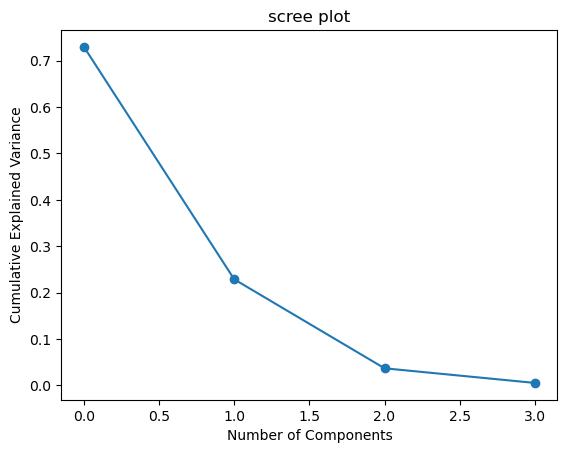

In [97]:
plt.title('scree plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
#plt.plot(range(1,5),pca.explained_variance_ratio_, marker='o')
plt.show()

In [103]:
pca=PCA(n_components=2)

pca_2factor = pca.fit_transform(x)
print(pd.DataFrame(pca_2factor).head())

pca_iris = pd.DataFrame (data=pca_2factor,columns=['pc1','pc2'])
pca_iris.head()

          0         1
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835


,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


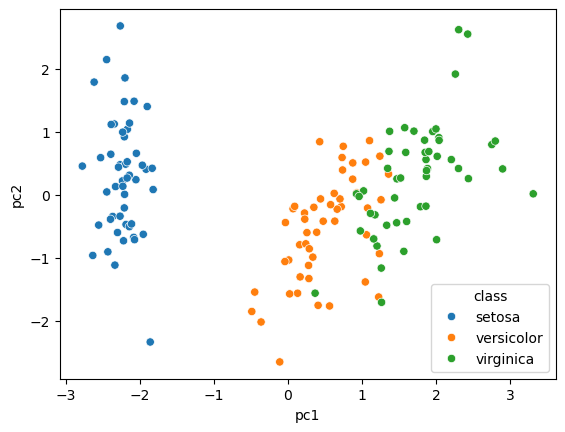

In [109]:
import seaborn as sns

sns.scatterplot(data=pca_iris,x='pc1',y='pc2',hue=iris['class'])
plt.show()

In [118]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
x,y = make_classification(n_samples=2000,n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

pd.DataFrame(x)

Counter({0: 1900, 1: 100})


,0,1,2,3,4,5
0,1.005092,1.982374,-1.528629,-0.652772,0.712041,1.596291
1,-0.400726,-0.164242,-1.007655,-0.739834,-1.065647,0.792187
2,-0.422467,2.399035,-2.838156,-1.481655,-0.015324,-1.512461
3,1.069393,1.939323,-1.423087,-0.587961,0.760781,1.694458
4,2.321385,1.802146,-0.984842,-0.310092,1.006561,1.028134
...,...,...,...,...,...,...
1995,0.311801,1.549304,-0.166522,0.209460,1.468946,0.092377
1996,-1.114090,0.105964,-1.035952,-0.702782,-0.808795,0.040808
1997,1.282591,1.968587,-1.445419,-0.597433,0.771500,0.866788
1998,-1.005400,-0.120859,-2.722715,-1.931102,-2.542430,1.116347


In [124]:
undersample = RandomUnderSampler (sampling_strategy='majority')
x_under,y_under = undersample.fit_resample(x,y)

print(Counter(y_under))

Counter({0: 100, 1: 100})


In [125]:
undersample = RandomUnderSampler (sampling_strategy=0.5)
x_under2,y_under2 = undersample.fit_resample(x,y)

print(Counter(y_under2))

Counter({0: 200, 1: 100})


In [126]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler (sampling_strategy='minority')
x_over,y_over = oversample.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


In [127]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler (sampling_strategy=0.5)
x_over2,y_over2 = oversample.fit_resample(x,y)
print(Counter(y_over2))

Counter({0: 1900, 1: 950})


In [129]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE (sampling_strategy='minority')
x_sm,y_sm = smote_sample.fit_resample(x,y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


Text(0.5, 1.0, 'SMOTE (Synthetic Minority Over-Sampling Tech)')

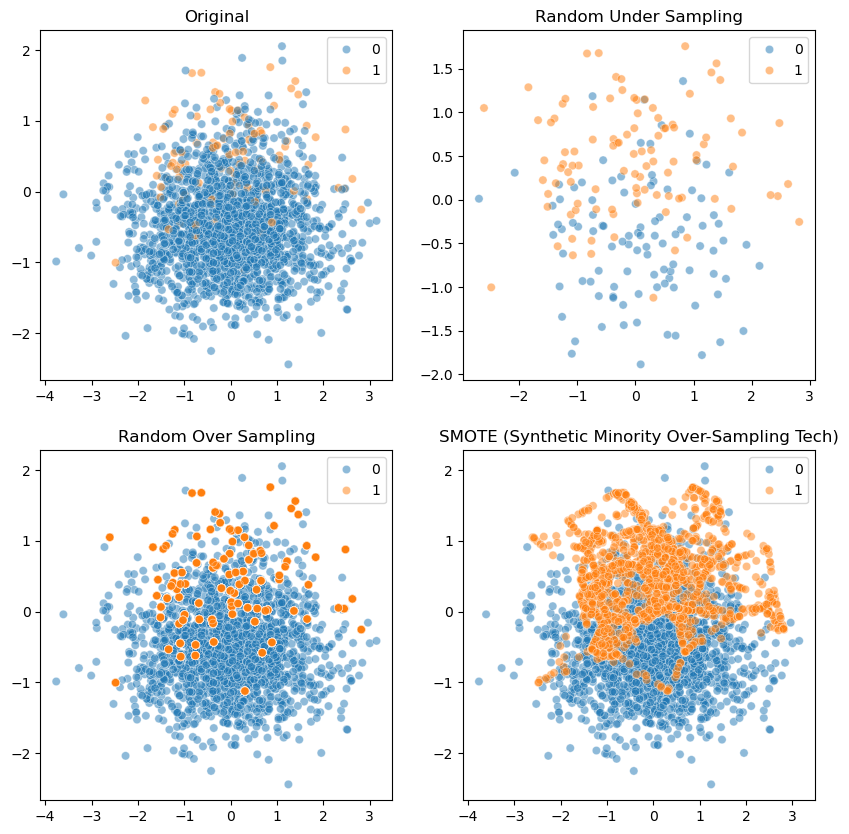

In [162]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.scatterplot(x=x[:,0], y=x[:,3], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x=x_under[:,0], y=x_under[:,3], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x=x_over[:,0], y=x_over[:,3], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x=x_sm[:,0], y=x_sm[:,3], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE (Synthetic Minority Over-Sampling Tech)')